In [2]:
import numpy as np
import matplotlib.pyplot as plt
print('Libraries imported')

Libraries imported


In [3]:
import pandas as pd
csvData = pd.read_csv('Indian_Startup_Investment_Trends.csv')

csvData.head()


,Startup_ID,Name,Sector,Sub-Sector,City,State,Founded_Year,Founder_Name,Funding_Stage,Investment_Type,...,Exit_Status,Acquisition_Details,Funding_Date,Pitch_Deck_Link,Social_Media_Followers,Competitors,Patents,ESG_Score,Diversity_Index,Net_Impact_Score
0,a713cd4f,Startup_0,Retail,Sub_2,Pune,Maharashtra,2022,Founder_356,Series D,Grant,...,No,NaN,2023-07-08,http://example.com/pitchdeck/0,27648,Competitor_88,11,5.32,39.33,4.71
1,b75f6987,Startup_1,EdTech,Sub_2,Pune,Karnataka,2019,Founder_93,IPO,Convertible Note,...,Yes,Acquirer_185,2017-01-02,http://example.com/pitchdeck/1,89143,Competitor_66,17,2.50,43.19,5.03
2,d5ba7ec2,Startup_2,AgriTech,Sub_7,Chennai,Tamil Nadu,2010,Founder_951,Series A,Grant,...,Yes,NaN,2022-06-20,http://example.com/pitchdeck/2,62445,Competitor_93,4,5.13,36.11,5.71
3,5190a643,Startup_3,HealthTech,Sub_8,Mumbai,Telangana,2007,Founder_538,IPO,Debt,...,Yes,NaN,2021-01-11,http://example.com/pitchdeck/3,30184,Competitor_31,13,9.14,31.38,9.29
4,a6801a40,Startup_4,HealthTech,Sub_6,Bangalore,Maharashtra,2019,Founder_69,Seed,Grant,...,No,NaN,2015-07-22,http://example.com/pitchdeck/4,56494,Competitor_27,0,8.10,78.20,1.12


In [4]:
csvData["Exit_Status"].value_counts()

Exit_Status
Yes    6242
No     6186
Name: count, dtype: int64

In [5]:
csvData[["ESG_Score", "Diversity_Index", "Net_Impact_Score"]].describe()


,ESG_Score,Diversity_Index,Net_Impact_Score
count,12428.000000,12428.000000,12428.000000
mean,5.497770,50.104718,5.483334
std,2.601163,17.400022,2.593964
min,1.000000,20.000000,1.000000
25%,3.250000,34.930000,3.220000
50%,5.530000,50.260000,5.470000
75%,7.750000,65.212500,7.750000
max,10.000000,79.990000,10.000000


In [6]:
csvData["Exit_Status_Binary"] = csvData["Exit_Status"].map({"Yes": 1, "No": -1})
print(csvData[["Exit_Status", "Exit_Status_Binary"]].head())

  Exit_Status  Exit_Status_Binary
0          No                  -1
1         Yes                   1
2         Yes                   1
3         Yes                   1
4          No                  -1


In [7]:
csvData[["ESG_Score", "Diversity_Index", "Net_Impact_Score", "Exit_Status_Binary"]].isnull().sum()

ESG_Score             0
Diversity_Index       0
Net_Impact_Score      0
Exit_Status_Binary    0
dtype: int64

In [8]:
from sklearn.preprocessing import StandardScaler

# Extract relevant columns
X = csvData[["ESG_Score", "Diversity_Index", "Net_Impact_Score"]].values  # Features
y = csvData["Exit_Status_Binary"].values  # Labels (+1 or -1)

# Standardize the feature values for better visualization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
def hinge_loss_with_alpha(y_true, f_x, alpha=1.0):
    return np.maximum(0, alpha - y_true * f_x)

In [10]:
weights = np.array([0.5, 0.3, 0.2])
f_x = np.dot(X_scaled, weights)

In [11]:
losses = hinge_loss_with_alpha(y, f_x)

predictions = np.sign(f_x)
accuracy = np.mean(predictions == y) * 100

# Print results
print(f"Alpha Value: {1}")
print(f"Mean Hinge Loss: {np.mean(losses):.4f}")
print(f"Accuracy: {accuracy:.2f}%")

Alpha Value: 1
Mean Hinge Loss: 1.0177
Accuracy: 49.44%


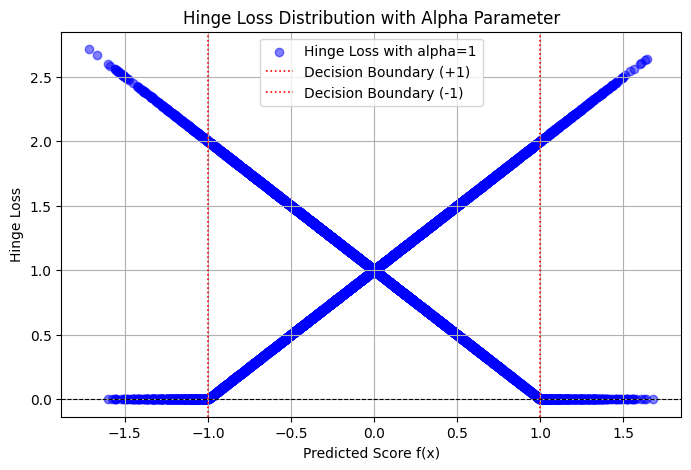

In [12]:
plt.figure(figsize=(8, 5))
plt.scatter(f_x, losses, alpha=0.5, label=f"Hinge Loss with alpha={1}", color="blue")
plt.axhline(y=0, color="black", linestyle="--", linewidth=0.8)
plt.axvline(x=1, color="red", linestyle=":", linewidth=1.2, label="Decision Boundary (+1)")
plt.axvline(x=-1, color="red", linestyle=":", linewidth=1.2, label="Decision Boundary (-1)")
plt.xlabel("Predicted Score f(x)")
plt.ylabel("Hinge Loss")
plt.title("Hinge Loss Distribution with Alpha Parameter")
plt.legend()
plt.grid()
plt.show()

Alpha Value: 0.5
Mean Hinge Loss: 0.5812
Accuracy: 49.44%


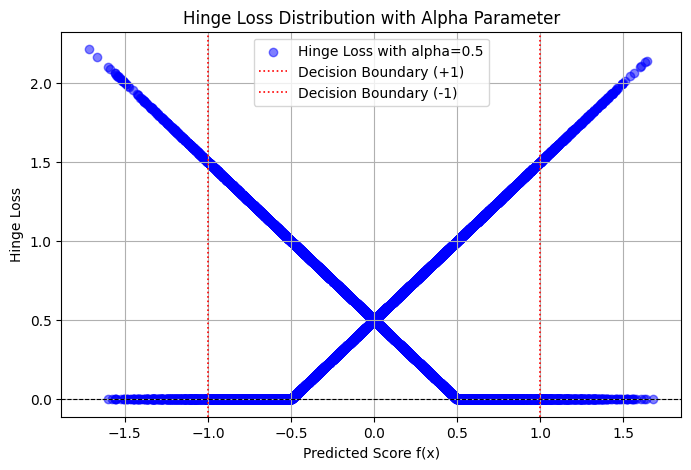

In [15]:
losses = hinge_loss_with_alpha(y, f_x, 0.5)
predictions = np.sign(f_x)
accuracy = np.mean(predictions == y) * 100

# Print results
print(f"Alpha Value: {0.5}")
print(f"Mean Hinge Loss: {np.mean(losses):.4f}")
print(f"Accuracy: {accuracy:.2f}%")
plt.figure(figsize=(8, 5))
plt.scatter(f_x, losses, alpha=0.5, label=f"Hinge Loss with alpha={0.5}", color="blue")
plt.axhline(y=0, color="black", linestyle="--", linewidth=0.8)
plt.axvline(x=1, color="red", linestyle=":", linewidth=1.2, label="Decision Boundary (+1)")
plt.axvline(x=-1, color="red", linestyle=":", linewidth=1.2, label="Decision Boundary (-1)")
plt.xlabel("Predicted Score f(x)")
plt.ylabel("Hinge Loss")
plt.title("Hinge Loss Distribution with Alpha Parameter")
plt.legend()
plt.grid()
plt.show()

Alpha Value: 0.1
Mean Hinge Loss: 0.3114
Accuracy: 49.44%


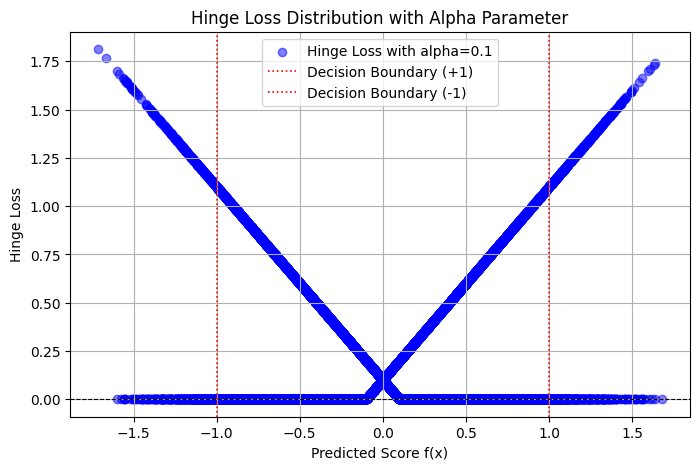

In [14]:
losses = hinge_loss_with_alpha(y, f_x, 0.1)
predictions = np.sign(f_x)
accuracy = np.mean(predictions == y) * 100

# Print results
print(f"Alpha Value: {0.1}")
print(f"Mean Hinge Loss: {np.mean(losses):.4f}")
print(f"Accuracy: {accuracy:.2f}%")
plt.figure(figsize=(8, 5))
plt.scatter(f_x, losses, alpha=0.5, label=f"Hinge Loss with alpha={0.1}", color="blue")
plt.axhline(y=0, color="black", linestyle="--", linewidth=0.8)
plt.axvline(x=1, color="red", linestyle=":", linewidth=1.2, label="Decision Boundary (+1)")
plt.axvline(x=-1, color="red", linestyle=":", linewidth=1.2, label="Decision Boundary (-1)")
plt.xlabel("Predicted Score f(x)")
plt.ylabel("Hinge Loss")
plt.title("Hinge Loss Distribution with Alpha Parameter")
plt.legend()
plt.grid()
plt.show()

Alpha Value: 0.01
Mean Hinge Loss: 0.2631
Accuracy: 49.44%


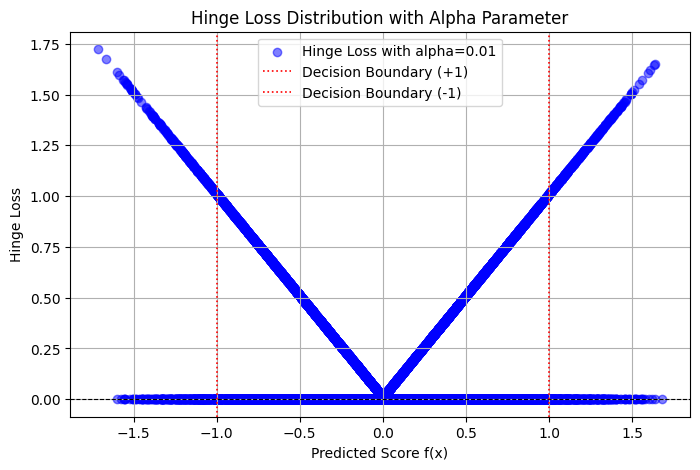

In [16]:
losses = hinge_loss_with_alpha(y, f_x, 0.01)
predictions = np.sign(f_x)
accuracy = np.mean(predictions == y) * 100

# Print results
print(f"Alpha Value: {0.01}")
print(f"Mean Hinge Loss: {np.mean(losses):.4f}")
print(f"Accuracy: {accuracy:.2f}%")
plt.figure(figsize=(8, 5))
plt.scatter(f_x, losses, alpha=0.5, label=f"Hinge Loss with alpha={0.01}", color="blue")
plt.axhline(y=0, color="black", linestyle="--", linewidth=0.8)
plt.axvline(x=1, color="red", linestyle=":", linewidth=1.2, label="Decision Boundary (+1)")
plt.axvline(x=-1, color="red", linestyle=":", linewidth=1.2, label="Decision Boundary (-1)")
plt.xlabel("Predicted Score f(x)")
plt.ylabel("Hinge Loss")
plt.title("Hinge Loss Distribution with Alpha Parameter")
plt.legend()
plt.grid()
plt.show()

Alpha Value: 0.001
Mean Hinge Loss: 0.2585
Accuracy: 49.44%


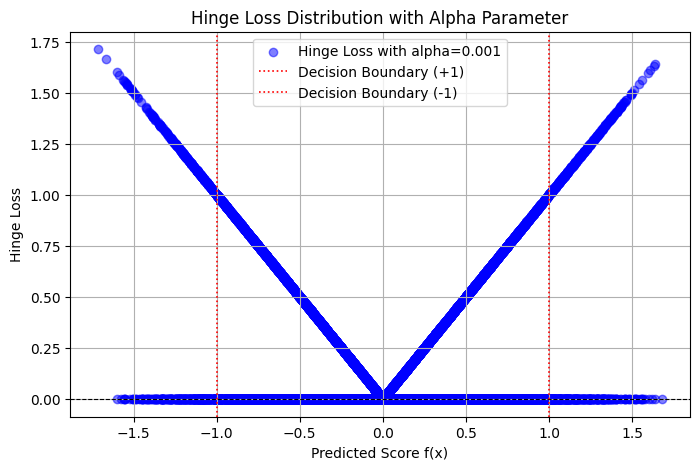

In [17]:
losses = hinge_loss_with_alpha(y, f_x, 0.001)
predictions = np.sign(f_x)
accuracy = np.mean(predictions == y) * 100

# Print results
print(f"Alpha Value: {0.001}")
print(f"Mean Hinge Loss: {np.mean(losses):.4f}")
print(f"Accuracy: {accuracy:.2f}%")
plt.figure(figsize=(8, 5))
plt.scatter(f_x, losses, alpha=0.5, label=f"Hinge Loss with alpha={0.001}", color="blue")
plt.axhline(y=0, color="black", linestyle="--", linewidth=0.8)
plt.axvline(x=1, color="red", linestyle=":", linewidth=1.2, label="Decision Boundary (+1)")
plt.axvline(x=-1, color="red", linestyle=":", linewidth=1.2, label="Decision Boundary (-1)")
plt.xlabel("Predicted Score f(x)")
plt.ylabel("Hinge Loss")
plt.title("Hinge Loss Distribution with Alpha Parameter")
plt.legend()
plt.grid()
plt.show()